# CO2 Emissions

In [21]:
import kagglehub
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

file_path = Path('co2_emissions.csv')
# df = pd.read_csv(file_path)
df = pd.read_csv(file_path)
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


# Overview of our dataset

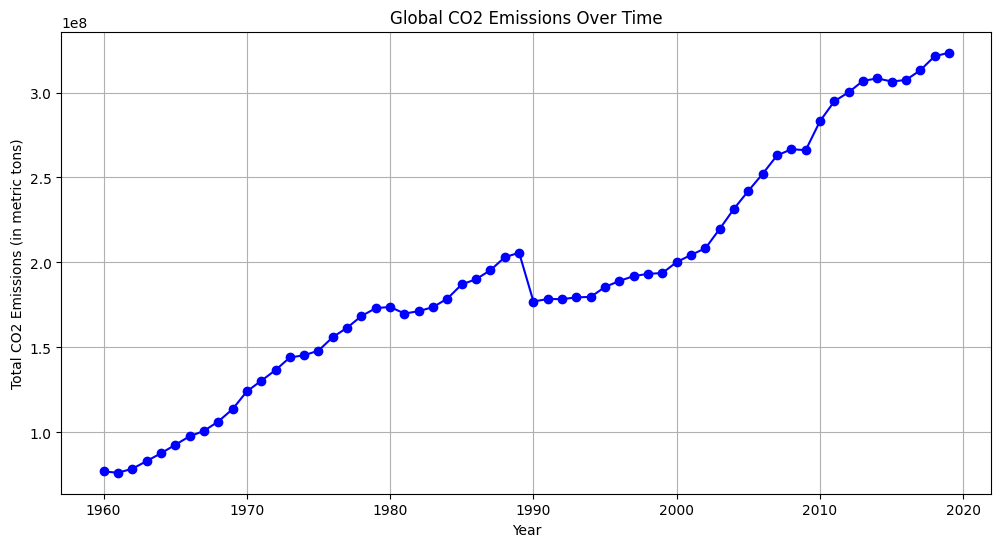

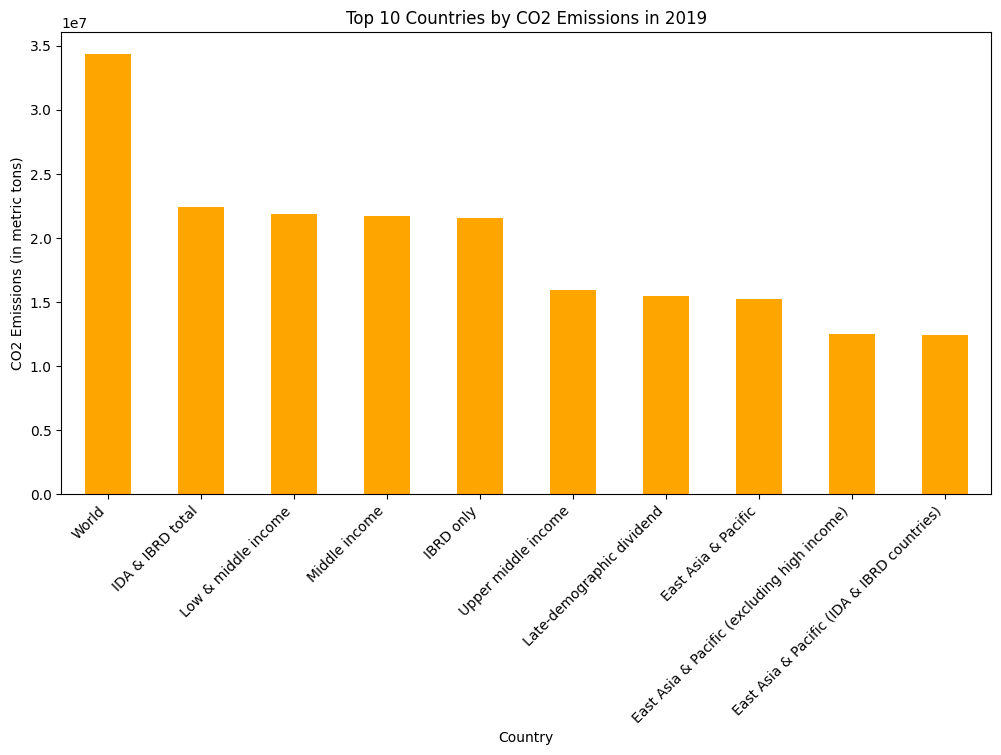

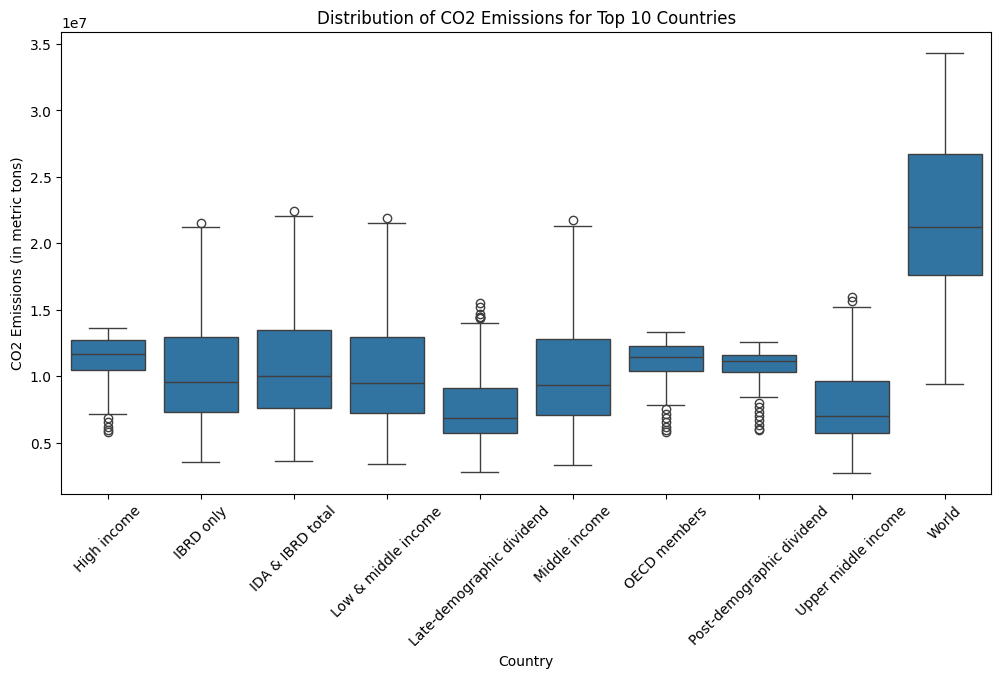

In [23]:
# Convert the 'year' column to numeric, if it isn't already
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Ensure that 'value' column (CO2 emissions) is numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Drop rows with missing values in 'value' or 'year'
df_clean = df.dropna(subset=['value', 'year'])

# 1. Global CO2 Emissions Over Time
global_emissions = df_clean.groupby('year')['value'].sum()

plt.figure(figsize=(12, 6))
plt.plot(global_emissions.index, global_emissions.values, marker='o', color='b')
plt.title("Global CO2 Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions (in metric tons)")
plt.grid(True)
plt.show()

# 2. Top 10 Countries by CO2 Emissions (Latest Year)
latest_year = df_clean['year'].max()
latest_data = df_clean[df_clean['year'] == latest_year]
top_countries = latest_data.groupby('country_name')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='orange')
plt.title(f"Top 10 Countries by CO2 Emissions in {latest_year}")
plt.xlabel("Country")
plt.ylabel("CO2 Emissions (in metric tons)")
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Distribution of CO2 Emissions Across Countries (Boxplot)
# Get the top 10 countries
top_10_countries = df_clean.groupby('country_name')['value'].sum().nlargest(10).index

# Create a new column grouping countries into "Other Countries"
df_clean['country_group'] = df_clean['country_name'].apply(
    lambda x: x if x in top_10_countries else 'Other Countries'
)

# Create the boxplot for the "Top 10"
top_10_countries = df_clean.groupby('country_name')['value'].sum().nlargest(10).index
# Filter the dataframe to include only the top 10 countries
df_top_10 = df_clean[df_clean['country_name'].isin(top_10_countries)]
# Create the boxplot for the top 10 countries
plt.figure(figsize=(12, 6))
sns.boxplot(x='country_name', y='value', data=df_top_10)
plt.title("Distribution of CO2 Emissions for Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("CO2 Emissions (in metric tons)")
plt.xticks(rotation=45)
plt.show()

# Measures of Location
## Central tendency of CO2 emissions by country

### Calculating Mean, Median and Mode

In [29]:
# Grouping by 'country_name' and calculating central tendency
central_tendency = df_clean.groupby('country_name')['value'].agg(['mean', 'median', 'std'])

# Display the first few countries' central tendency statistics
central_tendency.head()

,mean,median,std
country_name,,,
Afghanistan,2505.610925,1832.919490,1980.941185
Africa Eastern and Southern,346356.797418,342045.901512,141701.882288
Africa Western and Central,107556.729217,104082.294500,58733.255263
Albania,4413.947385,4297.697500,1915.145984
Algeria,70318.049070,73198.141500,45815.829743


### Visualizing Central Tendency

In [35]:
# Step 1: Get the top 10 countries by mean CO2 emissions
top_10_countries = df_clean.groupby('country_name')['value'].sum().nlargest(10).index

# Step 2: Create a new column 'country_group' to categorize the "Other Countries"
df_clean['country_group'] = df_clean['country_name'].apply(
    lambda x: x if x in top_10_countries else 'Other Countries'
)

# Now we have the 'country_group' column to group the countries into "Top 10" and "Other Countries"


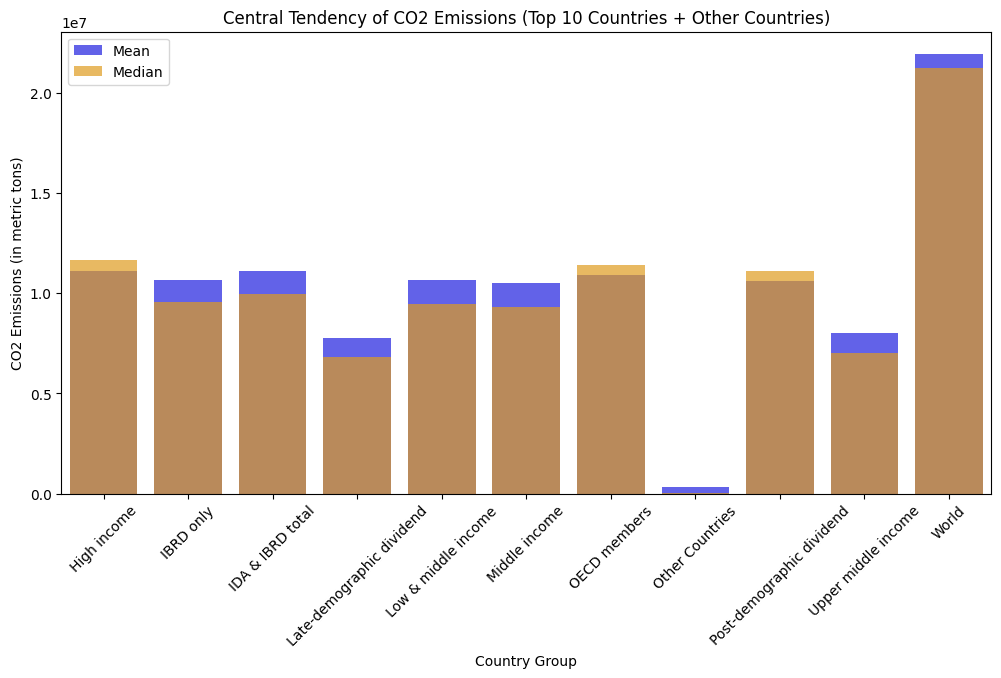

In [40]:
########### Barplot of Mean and Median CO2 Emissions for top 10 Countries
# Step 3: Grouping by 'country_group' and calculating central tendency (mean and median)
central_tendency_grouped = df_clean.groupby('country_group')['value'].agg(['mean', 'median'])

# Step 4: Plotting the Mean and Median CO2 emissions for the top 10 countries and 'Other Countries'
plt.figure(figsize=(12, 6))

# Mean CO2 emissions
sns.barplot(x=central_tendency_grouped.index, y=central_tendency_grouped['mean'], color='blue', alpha=0.7, label="Mean")
# Median CO2 emissions
sns.barplot(x=central_tendency_grouped.index, y=central_tendency_grouped['median'], color='orange', alpha=0.7, label="Median")

plt.title('Central Tendency of CO2 Emissions (Top 10 Countries + Other Countries)')
plt.xlabel('Country Group')
plt.ylabel('CO2 Emissions (in metric tons)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


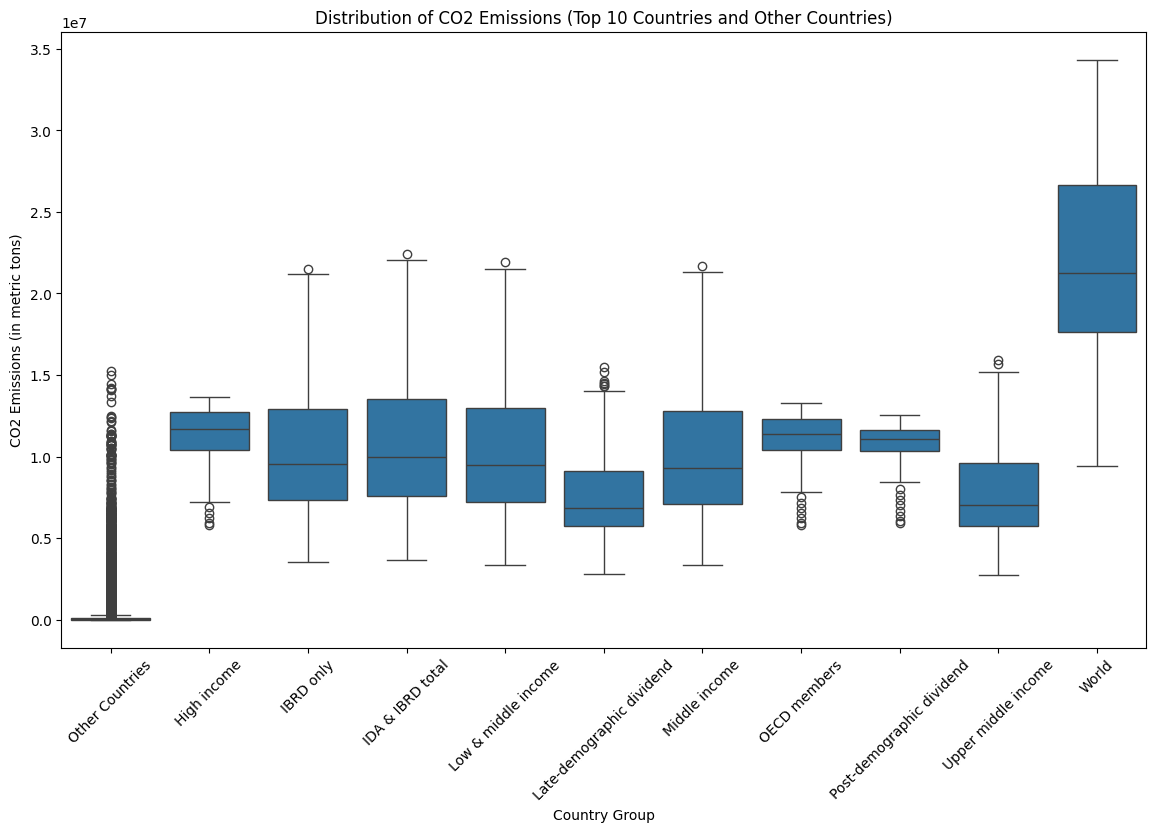

In [46]:
#### Boxplot of CO2 emissions by country group(Top 10 and other countries)
# Step 5: Boxplot showing the distribution of CO2 emissions for the top 10 countries and 'Other Countries'
plt.figure(figsize=(14, 8))
sns.boxplot(x='country_group', y='value', data=df_clean)
plt.title("Distribution of CO2 Emissions (Top 10 Countries and Other Countries)")
plt.xlabel("Country Group")
plt.ylabel("CO2 Emissions (in metric tons)")
plt.xticks(rotation=45)
plt.show()

# Shape of Data:
## Calculate the Skewness

In [54]:
# Calculate skewness of CO2 emissions for each country group
skewness = df_clean['value'].skew()

# Print skewness value
print(f"Skewness of CO2 emissions: {skewness:.2f}")

Skewness of CO2 emissions: 5.25


### Visualize the Distribution (Histogram and Density Plot)

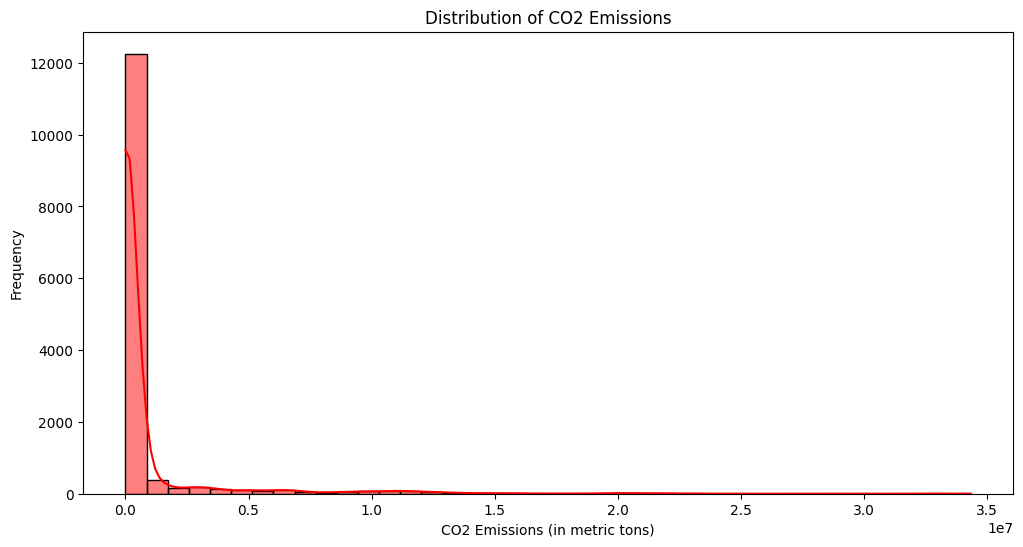

In [65]:
# Plotting the histogram and density plot of CO2 emissions to visualize the skewness
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(df_clean['value'], kde=True, color='red', bins=40)
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (in metric tons)")
plt.ylabel("Frequency")
plt.show()


In [67]:
# Calculate kurtosis
kurtosis = df_clean['value'].kurtosis()

# Print kurtosis value
print(f"Kurtosis of CO2 emissions: {kurtosis:.2f}")


Kurtosis of CO2 emissions: 34.66


# Graphical Analysis of Data
### Boxplots of CO2 Emissions by Continents

In [72]:
# Example mapping of countries to continents (this is just a small sample for illustration)
continent_mapping = {
    'United States': 'North America',
    'China': 'Asia',
    'India': 'Asia',
    'Germany': 'Europe',
    'Brazil': 'South America',
    'Russia': 'Europe',
    'Australia': 'Oceania',
    'South Africa': 'Africa',
    # Add more countries here...
}

# Add a 'continent' column to the dataset by mapping the 'country_name' to 'continent'
df_clean['continent'] = df_clean['country_name'].map(continent_mapping)

# Check if continent information is added correctly
df_clean.head()

,country_code,country_name,year,value,country_group,continent
0,ABW,Aruba,1960,11092.675,Other Countries,NaN
1,ABW,Aruba,1961,11576.719,Other Countries,NaN
2,ABW,Aruba,1962,12713.489,Other Countries,NaN
3,ABW,Aruba,1963,12178.107,Other Countries,NaN
4,ABW,Aruba,1964,11840.743,Other Countries,NaN


In [78]:
# # Step 2: Plotting boxplot of CO2 emissions by continent
# plt.figure(figsize=(14, 8))

# sns.boxplot(x='continent', y='value', data=df_clean)
# plt.title("Distribution of CO2 Emissions by Continent")
# plt.xlabel("Continent")
# plt.ylabel("CO2 Emissions (in metric tons)")
# plt.xticks(rotation=45)
# plt.show()

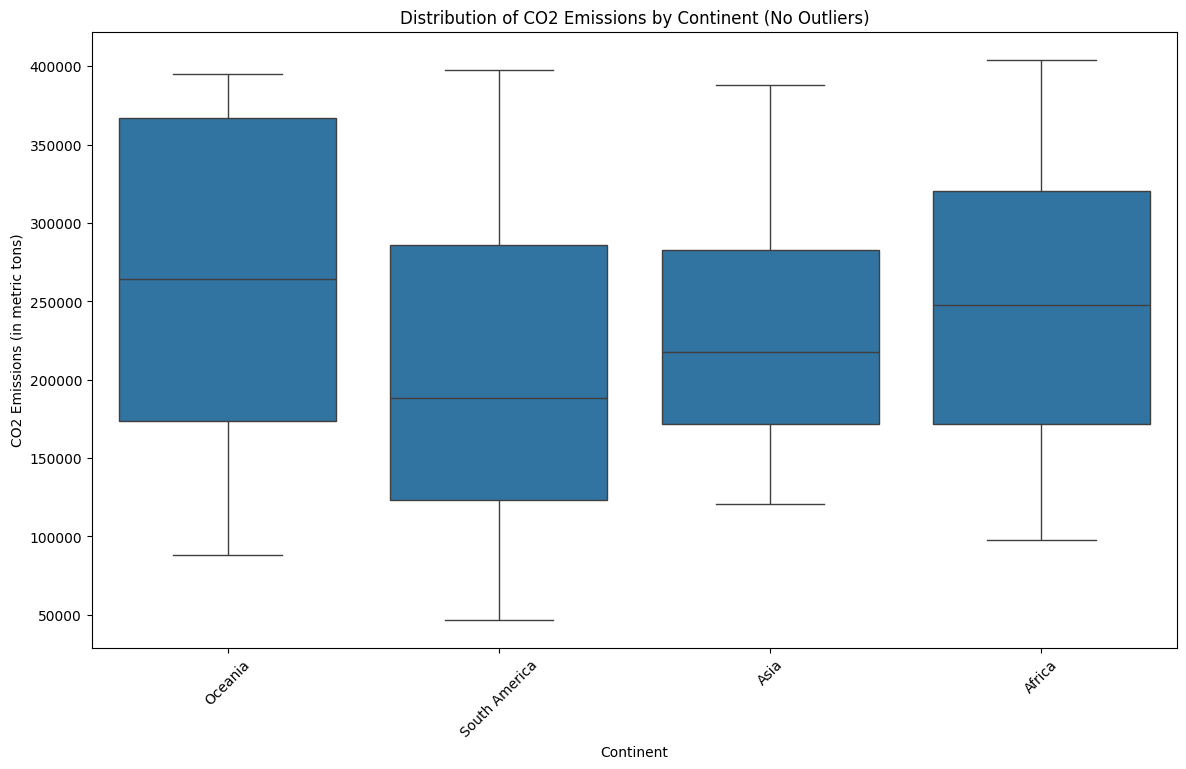

In [80]:
# Step 4: Remove outliers from the data by continent (optional)
df_clean_no_outliers = remove_outliers(df_clean, 'value')

# Step 5: Create a boxplot with the filtered data
plt.figure(figsize=(14, 8))
sns.boxplot(x='continent', y='value', data=df_clean_no_outliers)
plt.title("Distribution of CO2 Emissions by Continent (No Outliers)")
plt.xlabel("Continent")
plt.ylabel("CO2 Emissions (in metric tons)")
plt.xticks(rotation=45)
plt.show()

# Two Sample Tests
### Test for differences in CO2 emissions between developed and developing countries.

In [90]:
# Example mapping of countries to 'developed' and 'developing'
country_classification = {
    'United States': 'Developed',
    'Germany': 'Developed',
    'Japan': 'Developed',
    'India': 'Developing',
    'China': 'Developing',
    'Brazil': 'Developing',
    'South Africa': 'Developing',
    # Add more countries here...
}

# Add the 'country_classification' to the df_clean dataframe
df_clean['classification'] = df_clean['country_name'].map(country_classification)

# Check the classification
df_clean.head()


,country_code,country_name,year,value,country_group,continent,classification
0,ABW,Aruba,1960,11092.675,Other Countries,NaN,NaN
1,ABW,Aruba,1961,11576.719,Other Countries,NaN,NaN
2,ABW,Aruba,1962,12713.489,Other Countries,NaN,NaN
3,ABW,Aruba,1963,12178.107,Other Countries,NaN,NaN
4,ABW,Aruba,1964,11840.743,Other Countries,NaN,NaN


In [92]:
# Split the dataset into two groups: Developed and Developing countries
developed_countries = df_clean[df_clean['classification'] == 'Developed']
developing_countries = df_clean[df_clean['classification'] == 'Developing']

# Check the sizes of both groups
print(f"Number of Developed countries: {developed_countries.shape[0]}")
print(f"Number of Developing countries: {developing_countries.shape[0]}")


Number of Developed countries: 150
Number of Developing countries: 240


In [94]:
from scipy import stats

# Step 3: Perform a t-test to compare CO2 emissions between Developed and Developing countries
t_stat, p_value = stats.ttest_ind(developed_countries['value'], developing_countries['value'], nan_policy='omit')

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 5.54
P-value: 0.0000


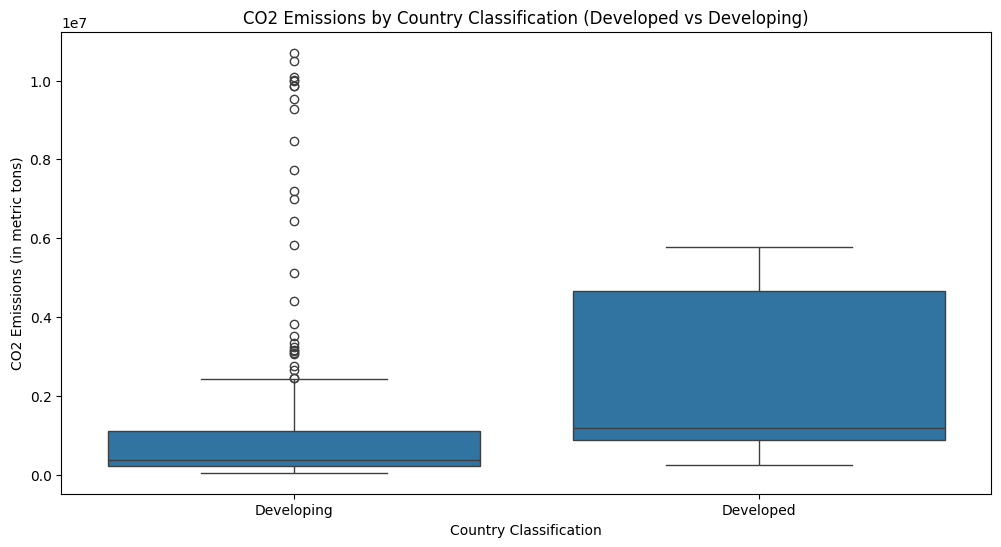

In [98]:
# Plotting boxplots for Developed vs Developing countries
plt.figure(figsize=(12, 6))

sns.boxplot(x='classification', y='value', data=df_clean)
plt.title("CO2 Emissions by Country Classification (Developed vs Developing)")
plt.xlabel("Country Classification")
plt.ylabel("CO2 Emissions (in metric tons)")
plt.show()
